In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import heapq
from ucimlrepo import fetch_ucirepo 

sns.set_palette("pastel", 9)
#husl

### Handling missing values 
* capital -> remove 99999
* removing rows with more than 1 missing value

### Processing functions

In [18]:
def my_read_data():
    # fetch dataset 
    adult = fetch_ucirepo(id=2) 
    
    # data (as pandas dataframes) 
    df = adult.data.original
    X = adult.data.features 
    Y = adult.data.targets 

    # metadata 
    #print(adult.metadata) 
    
    # variable information 
    #print(adult.variables) 

    return df, X, Y



def general_info(df):
    print("################### Shape #################### \n", df.shape, "\n")
    print("################### Info ####################")
    df.info()
    print("\n", "################### Unique values #################### \n", df.nunique(), "\n")
    print("################### Nulls #################### \n", df.isnull().sum(axis=0), "\n")
    print("################### Description #################### \n")
    return df.describe().T


def remove_leading_space(value):
    if isinstance(value, str) and value.startswith(' '):
        return value.lstrip()
    else:
        return value
    

def check_largest(df, column, n):
    x = heapq.nlargest(n, df[column].unique())
    print(x)

def check_smallest(df, column, n):
    x = heapq.nsmallest(n, df[column].unique())
    print(x)

**fnlwgt** indicates how many people have the same features

In [19]:
df, X, Y = my_read_data()

# Delete redundant attributes
df.pop("education")

# Delete leading space
df = df.applymap(remove_leading_space)

# Handle '?' missing values
df = df.replace("?", np.nan)

                workclass  occupation  native-country
Missing values       2799        2809             857
Valid values        46043       46033           47985


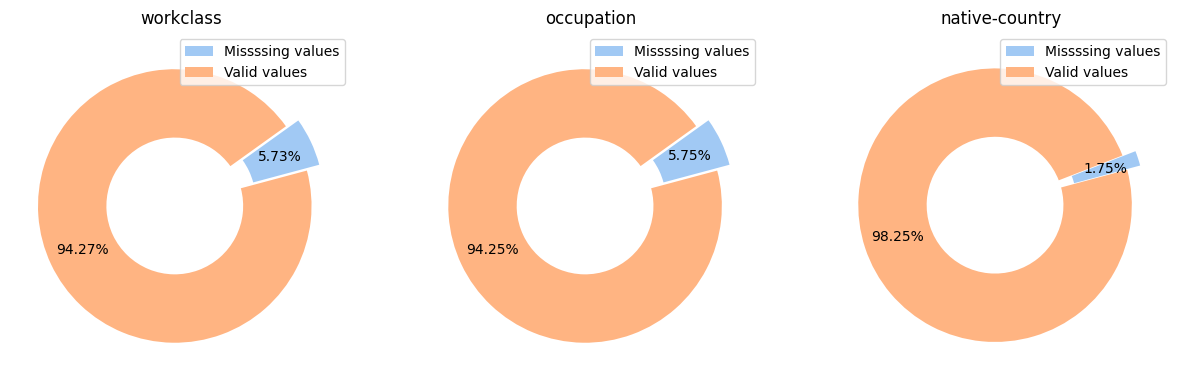

In [20]:
df_missing_values = pd.DataFrame({"Missing values": df.isnull().sum(), 
                                  "Valid values": df.notnull().sum()})
#df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0]
df_missing_values = df_missing_values[df_missing_values['Missing values'] > 0]
df_missing_values = df_missing_values.T

fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(15, 7))
print(df_missing_values)
axes = axes.flatten()

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missssing values', 'Valid values']
    ax  = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75)
    ax.set_title(col)
    ax.legend(labels)

In [21]:
# Capital bilans
df["capital-gain"] = df["capital-gain"] - df["capital-loss"] 
df = df.rename(columns = {"capital-gain":"capital"})
df.pop("capital-loss")


# Suspicios values with 9s



n = len(df)
n_features = len(df.columns) - 1

df.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K


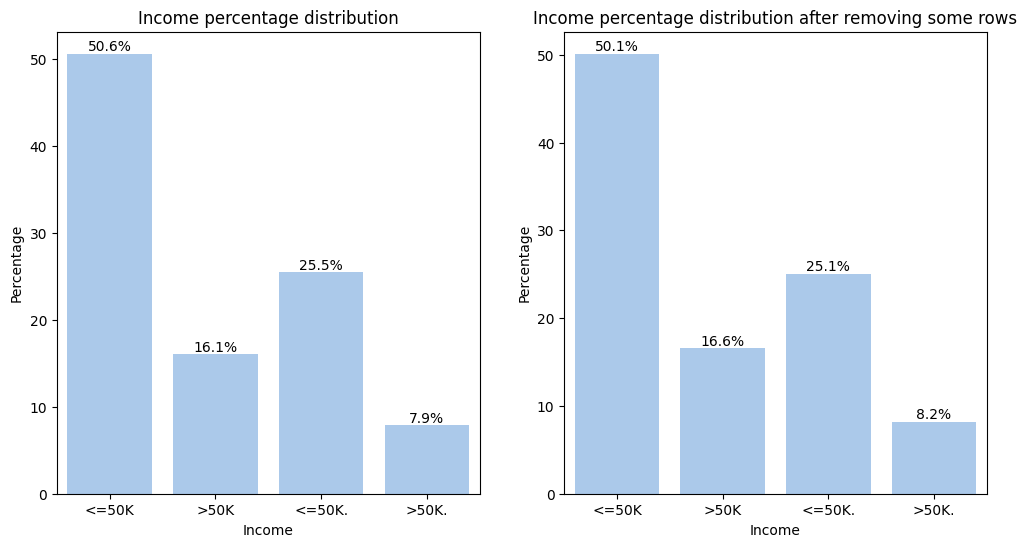

In [22]:
def null_count(row):
    return row.isnull().sum()

def nulls_table(data, threshold):
    
    temp_df = data.copy()
    temp_df['how-many-miss-vals'] = temp_df.apply(null_count, axis=1)
    temp_df_reduced = temp_df[temp_df['how-many-miss-vals'] <= threshold]
    nulls = temp_df_reduced['how-many-miss-vals'].value_counts()
    
    """no9 = temp_df_reduced[temp_df_reduced['capital'] != 99999]"""
    ### data distribution plotting ###
    fig, axes = plt.subplots(1, 2, figsize=(12,6))

    ax1 = sns.countplot(data=temp_df, x="income", stat="percent", ax=axes[0])
    ax1.set_ylabel("Percentage")
    ax1.set_xlabel("Income")
    ax1.set_title("Income percentage distribution")


    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
        
    ax2 = sns.countplot(data=temp_df_reduced, x="income", stat="percent", ax=axes[1])
    ax2.set_ylabel("Percentage")
    ax2.set_xlabel("Income")
    ax2.set_title("Income percentage distribution after removing some rows")


    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    ### ### ###
    
    return temp_df_reduced

df_less_nulls = nulls_table(df,1)

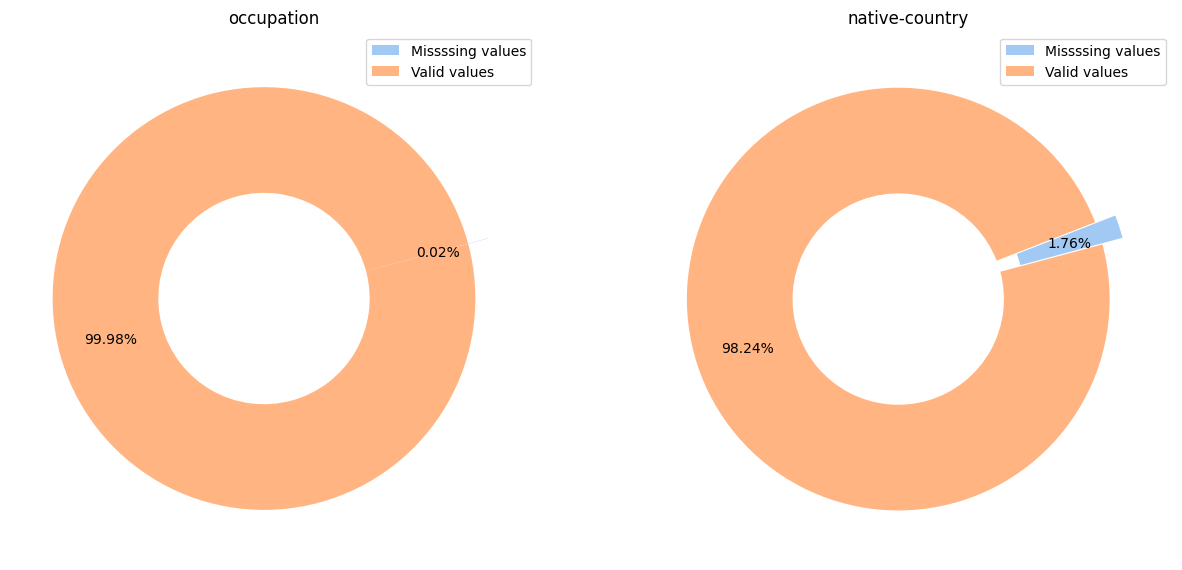

In [23]:
# plotting only these columns that have missing values

df_missing_values = pd.DataFrame({"Missing values": df_less_nulls.isnull().sum(), 
                                  "Valid values": df_less_nulls.notnull().sum()})
#df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0]
df_missing_values = df_missing_values[df_missing_values['Missing values'] > 0]
df_missing_values = df_missing_values.T

fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(15, 7))

axes = axes.flatten()

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missssing values', 'Valid values']
    ax  = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75)
    ax.set_title(col)
    ax.legend(labels)


In [24]:
general_info(df)

################### Shape #################### 
 (48842, 13) 

################### Info ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital         48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  47985 non-null  object
 12  income          48842 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB

 ################### Unique values #################### 
 age          

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital,48842.0,991.565313,7475.549906,-4356.0,0.0,0.0,0.0,99999.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


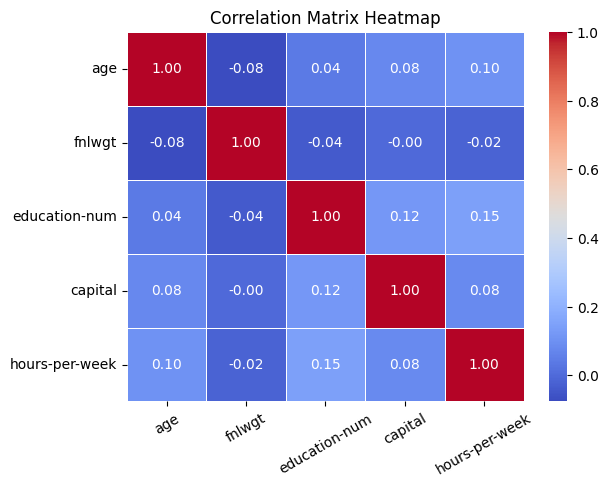

In [25]:
numeric_df = df_less_nulls.select_dtypes(include=['int','float']).drop('how-many-miss-vals',axis=1)

heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 30)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Conclusion**: there's no significant correlation

## Max values with 9s

In [26]:
check_largest(df, "capital", 10)

[99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051, 18481, 15831]


In [27]:
check_smallest(df, "capital", 10)

[-4356, -3900, -3770, -3683, -3175, -3004, -2824, -2754, -2603, -2559]


In [28]:
df_less_nulls[df_less_nulls['capital'] == 99999].shape

(239, 14)

In [29]:
def count_sth_grouped(df, value_up, column, compare_column, title,
                      relation='equal', value_down=None, ax=None, rotat=60,
                      hue_col=None):
    
    df = df[[column, compare_column, "income"]]
    
    if relation == 'equal':
        df_reduced = df[df[column] == value_up]
    if relation == 'lower':
        df_reduced = df[df[column] <= value_up]
    if relation == 'greater':
        df_reduced = df[df[column] >= value_up]
    if relation == 'between':
        df_reduced = df[(df[column] <= value_up) & (df[column] > value_down)]
    
        
    df_reduced = df_reduced.groupby([compare_column, "income"]).count()
    df_reduced = df_reduced.reset_index()
    if hue_col is None:
        cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax)
    else:
        cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, hue=hue_col, ax=ax)
        
    for p in cnt_plot.patches:
        if p.get_height() != 0:  
            cnt_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
        
    cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
    cnt_plot.set_ylabel("count")
    cnt_plot.set_title(title) #wroc
    plt.tight_layout()

C:\Users\mateu\AppData\Local\Temp\ipykernel_10856\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


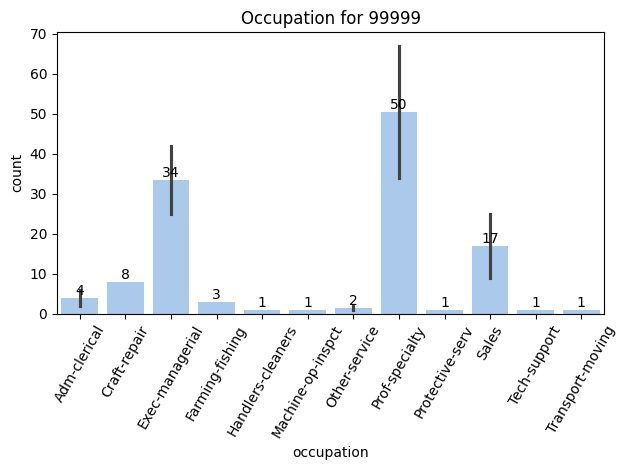

In [30]:
count_sth_grouped(df_less_nulls, 99999, 'capital', 'occupation', "Occupation for 99999",
                  relation = 'equal')

In [31]:
check_largest(df_less_nulls, "hours-per-week", 40)
# godziny zawod

[99, 98, 97, 96, 95, 94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57]


C:\Users\mateu\AppData\Local\Temp\ipykernel_10856\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


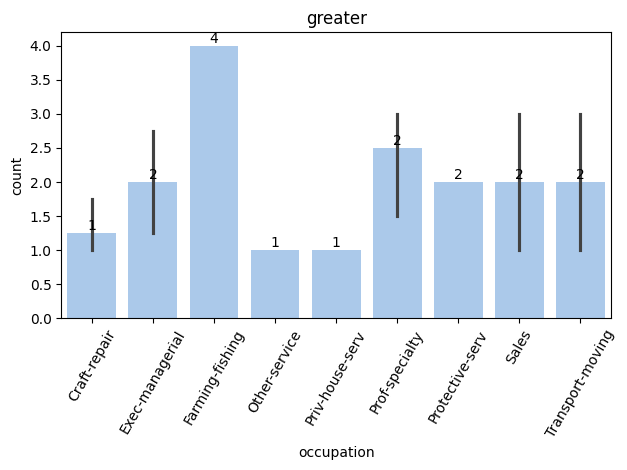

In [32]:
count_sth_grouped(df_less_nulls, 90, 'hours-per-week', 'occupation', 'greater')

C:\Users\mateu\AppData\Local\Temp\ipykernel_10856\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\mateu\AppData\Local\Temp\ipykernel_10856\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\mateu\AppData\Local\Temp\ipykernel_10856\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\mateu\AppData\Local\Temp\ipykernel_10856\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

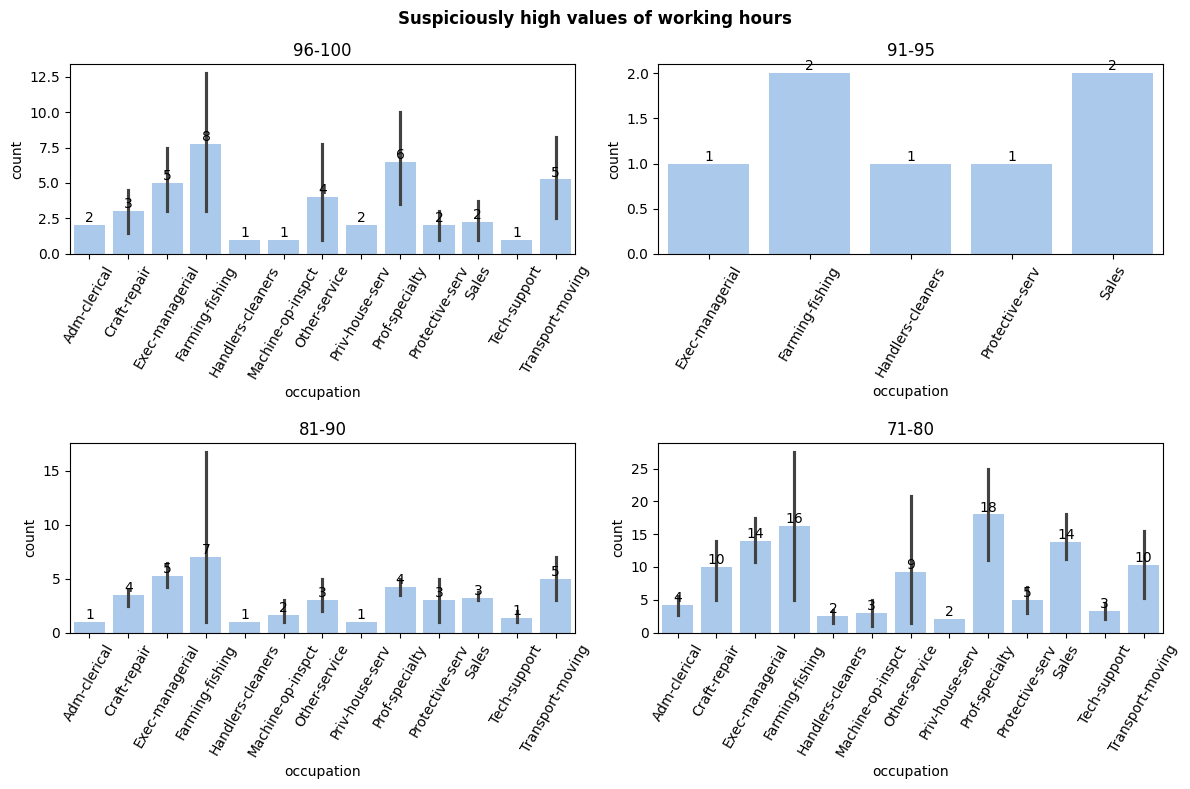

In [33]:
fig, axes = plt.subplots(2,2, figsize=(12,8))

plt.suptitle("Suspiciously high values of working hours", fontweight = "bold")

count_sth_grouped(df_less_nulls, 100, 'hours-per-week', 'occupation', "96-100",
                  'between', 95, ax=axes[0,0])

count_sth_grouped(df_less_nulls, 95, 'hours-per-week', 'occupation', "91-95",
                  'between', 90, ax=axes[0,1])

count_sth_grouped(df_less_nulls, 90, 'hours-per-week', 'occupation', "81-90",
                  'between', 80, ax=axes[1,0])

count_sth_grouped(df_less_nulls, 80, 'hours-per-week', 'occupation', "71-80",
                  'between', 70, ax=axes[1,1])

plt.subplots_adjust(hspace=1)

C:\Users\mateu\AppData\Local\Temp\ipykernel_10856\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\mateu\AppData\Local\Temp\ipykernel_10856\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\mateu\AppData\Local\Temp\ipykernel_10856\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\mateu\AppData\Local\Temp\ipykernel_10856\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

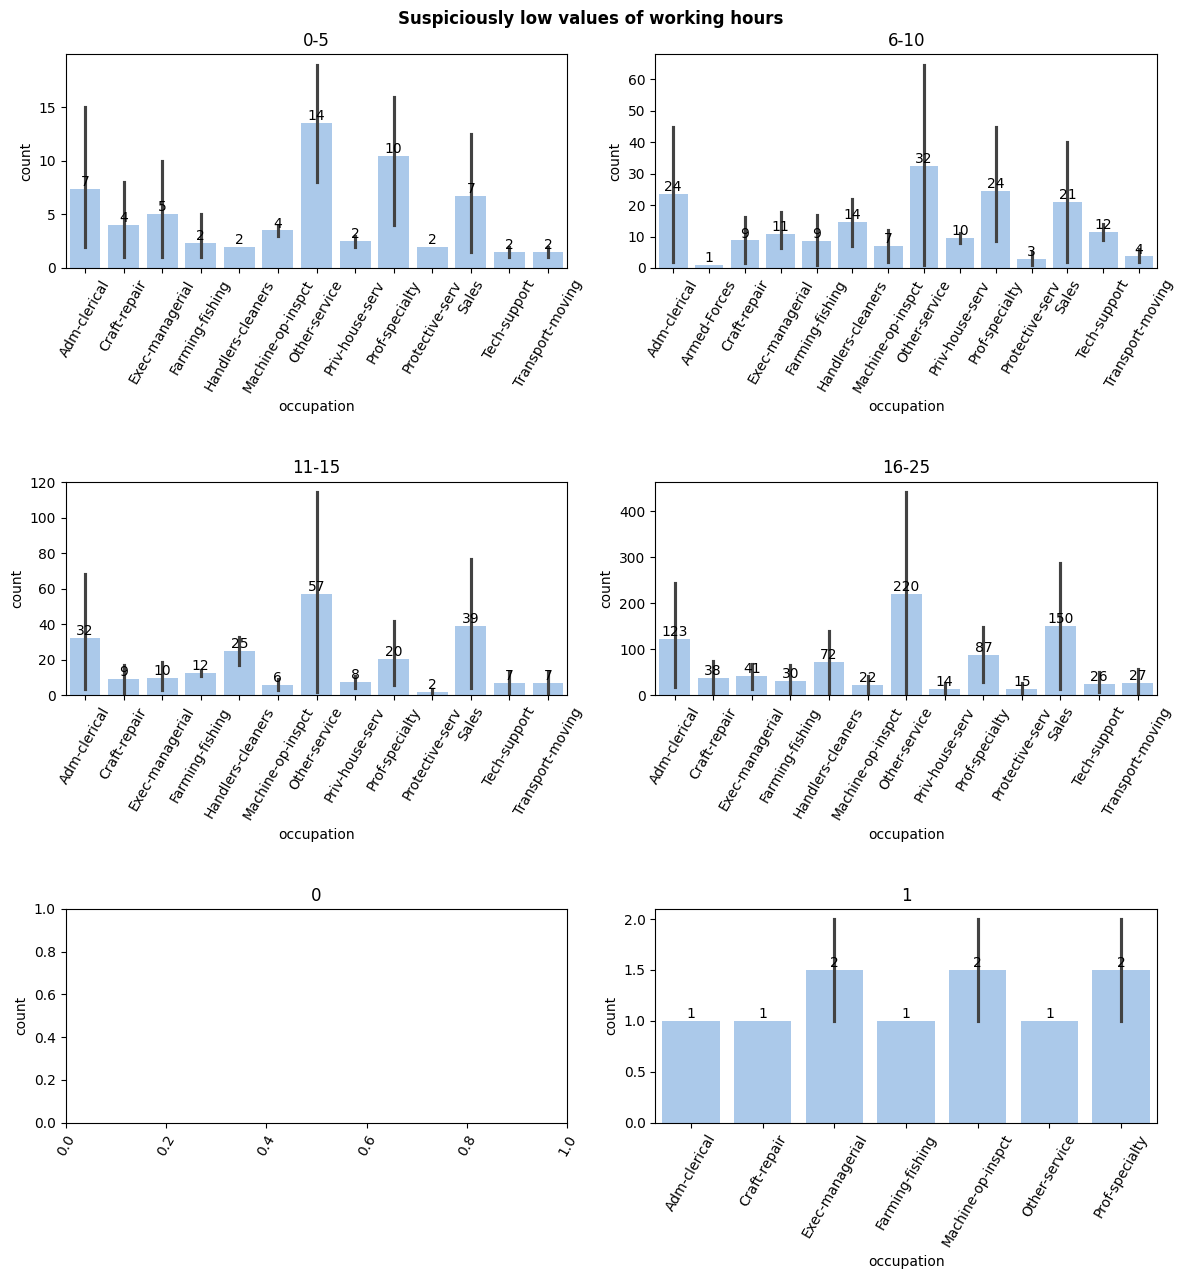

In [34]:
fig, axes = plt.subplots(3,2, figsize=(12,13))

plt.suptitle("Suspiciously low values of working hours", fontweight = "bold")

count_sth_grouped(df_less_nulls, 5, 'hours-per-week', 'occupation', "0-5",
                  'between', -1, ax=axes[0,0])

count_sth_grouped(df_less_nulls, 10, 'hours-per-week', 'occupation', "6-10",
                  'between', 5, ax=axes[0,1])

count_sth_grouped(df_less_nulls, 15, 'hours-per-week', 'occupation', "11-15",
                  'between', 10, ax=axes[1,0])

count_sth_grouped(df_less_nulls, 25, 'hours-per-week', 'occupation', "16-25",
                  'between', 15, ax=axes[1,1])

count_sth_grouped(df_less_nulls, 0, 'hours-per-week', 'occupation', "0",
                  'equal',ax=axes[2,0])

count_sth_grouped(df_less_nulls, 1, 'hours-per-week', 'occupation', "1",
                  'equal',ax=axes[2,1])

plt.subplots_adjust(hspace=1)

In [35]:
count_sth_grouped(df_less_nulls, 5, 'hours-per-week', 'income', 
                  "income class distribution for low-earning individuals",
                  'lower', rotat=0)

ValueError: Grouper for 'income' not 1-dimensional

In [ ]:
def draw_subplots_high(compare_column, rotat_value, hue_col=None):

    fig, axes = plt.subplots(2,2, figsize=(16,8))

    plt.suptitle("Suspiciously high values of working hours", fontweight = "bold")

    count_sth_grouped(df_less_nulls, 100, 'hours-per-week', compare_column, "96-100",
                    'between', 95, ax=axes[0,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(df_less_nulls, 95, 'hours-per-week', compare_column, "91-95",
                    'between', 90, ax=axes[0,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(df_less_nulls, 90, 'hours-per-week', compare_column, "81-90",
                    'between', 80, ax=axes[1,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(df_less_nulls, 80, 'hours-per-week', compare_column, "71-80",
                    'between', 70, ax=axes[1,1], rotat=rotat_value, hue_col=hue_col)

    plt.subplots_adjust(hspace=1)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\2840921529.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\2840921529.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\2840921529.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\2840921529.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

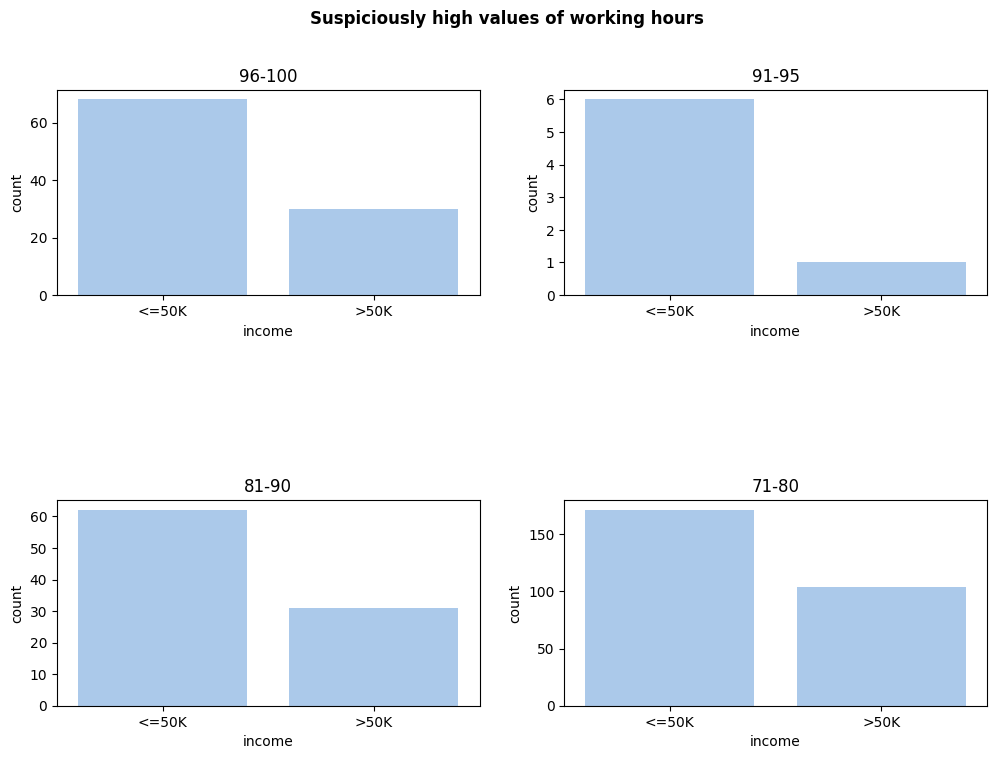

In [ ]:
draw_subplots_high("income", 0)

In [ ]:
def draw_subplots_low(compare_column, rotat_value, hue_col=None):

    fig, axes = plt.subplots(3,2, figsize=(12,13))

    plt.suptitle("Suspiciously low values of working hours", fontweight = "bold")

    count_sth_grouped(df_less_nulls, 5, 'hours-per-week', compare_column, "0-5",
                    'between', -1, ax=axes[0,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(df_less_nulls, 10, 'hours-per-week', compare_column, "6-10",
                    'between', 5, ax=axes[0,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(df_less_nulls, 15, 'hours-per-week', compare_column, "11-15",
                    'between', 10, ax=axes[1,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(df_less_nulls, 25, 'hours-per-week', compare_column, "16-25",
                    'between', 15, ax=axes[1,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(df_less_nulls, 0, 'hours-per-week', compare_column, "0",
                    'equal',ax=axes[2,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(df_less_nulls, 1, 'hours-per-week', compare_column, "1",
                    'equal',ax=axes[2,1], rotat=rotat_value, hue_col=hue_col)

    plt.subplots_adjust(hspace=1)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\2840921529.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\2840921529.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\2840921529.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\2840921529.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

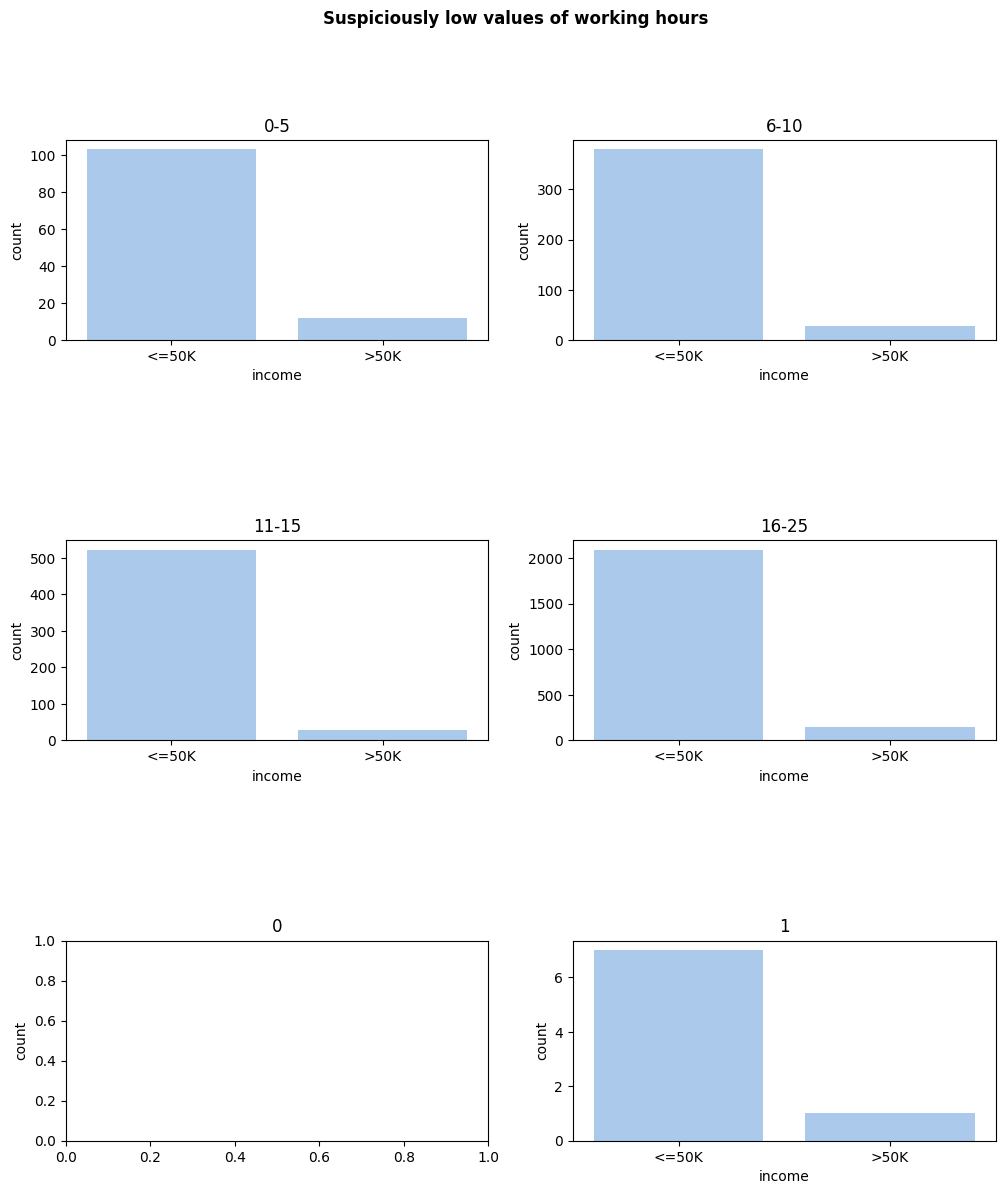

In [ ]:
draw_subplots_low("income",0)

In [ ]:
check_smallest(df_less_nulls, "hours-per-week", 20)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [ ]:
df_less_nulls[df_less_nulls['hours-per-week'] <= 5]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,native-country,income,how-many-miss-vals
157,71,Self-emp-not-inc,494223,10,Separated,Sales,Unmarried,Black,Male,-1816,2,United-States,<=50K,0
189,58,State-gov,109567,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1,United-States,>50K,0
684,18,State-gov,59342,7,Never-married,Adm-clerical,Own-child,White,Female,0,5,United-States,<=50K,0
1036,66,Self-emp-inc,150726,5,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,1,NaN,<=50K,1
1389,17,Private,46496,7,Never-married,Other-service,Own-child,White,Male,0,5,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32018,18,Private,41973,7,Never-married,Adm-clerical,Own-child,White,Female,0,5,United-States,<=50K,0
32036,18,Private,36162,7,Never-married,Craft-repair,Own-child,White,Male,0,5,United-States,<=50K,0
32147,50,Self-emp-not-inc,240922,12,Never-married,Sales,Not-in-family,White,Female,-1408,5,United-States,<=50K,0
32314,18,Never-worked,153663,10,Never-married,NaN,Own-child,White,Male,0,4,United-States,<=50K,1


# GROUPING

In [233]:
region_mapping = {
    'United-States': "United-States",
    'Cuba' : "Middle America", 
    'Jamaica': "Middle America", 
    'India': "South Asia",
    'Mexico': "Mexico",
    'South': np.nan,    #### ??????
    'Puerto-Rico': "Middle America", 
    'Honduras': "Middle America", 
    'England': "West Europe", 
    'Canada': "Canada",
    'Germany': "Central Europe", 
    'Iran': "West Asia", 
    'Philippines': "Southeast Asia", 
    'Italy': "Central Europe", 
    'Poland': "East Europe",
    'Columbia': "South America", 
    'Cambodia': "Southeast Asia", 
    'Thailand': "Southeast Asia", 
    'Ecuador': "South America", 
    'Laos': "Southeast Asia",
    'Taiwan': "West Asia", 
    'Haiti': "Middle America", 
    'Portugal': "West Europe", 
    'Dominican-Republic': "Middle America",
    'El-Salvador': "Middle America", 
    'France': "West Europe", 
    'Guatemala': "Middle America", 
    'China': "East Asia", 
    'Japan': "East Asia",
    'Yugoslavia' : "East Europe", 
    'Peru': "South America", 
    'Outlying-US': "Outlying-US", 
    'Scotland': "West Europe",
    'Trinadad&Tobago': "South America", 
    'Greece': "South Europe", 
    'Nicaragua': "Middle America", 
    'Vietnam': "Southeast Asia", 
    'Hong': np.nan,           #### ??????
    'Ireland': "West Europe", 
    'Hungary': "East Europe", 
    'Holand-Netherlands': "Central Europe"
}


df_less_nulls["native-country"] = df_less_nulls["native-country"].map(region_mapping, na_action="ignore")
df_less_nulls = df_less_nulls.rename(columns={'native-country':'region'})

In [181]:
bins= [0,18,25,31,41,51,61,71,150]
labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71+']
df_less_nulls['age'] = pd.cut(df_less_nulls['age'], bins=bins, labels=labels_age, right=False)
df_less_nulls.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income,how-many-miss-vals
0,31-40,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K,0
1,41-50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K,0
2,31-40,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K,0
3,51-60,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K,0
4,25-30,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Middle America,<=50K,0


In [182]:
#df.to_csv(Path("adults_data","adult_cleaned_data.csv"), index=None)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

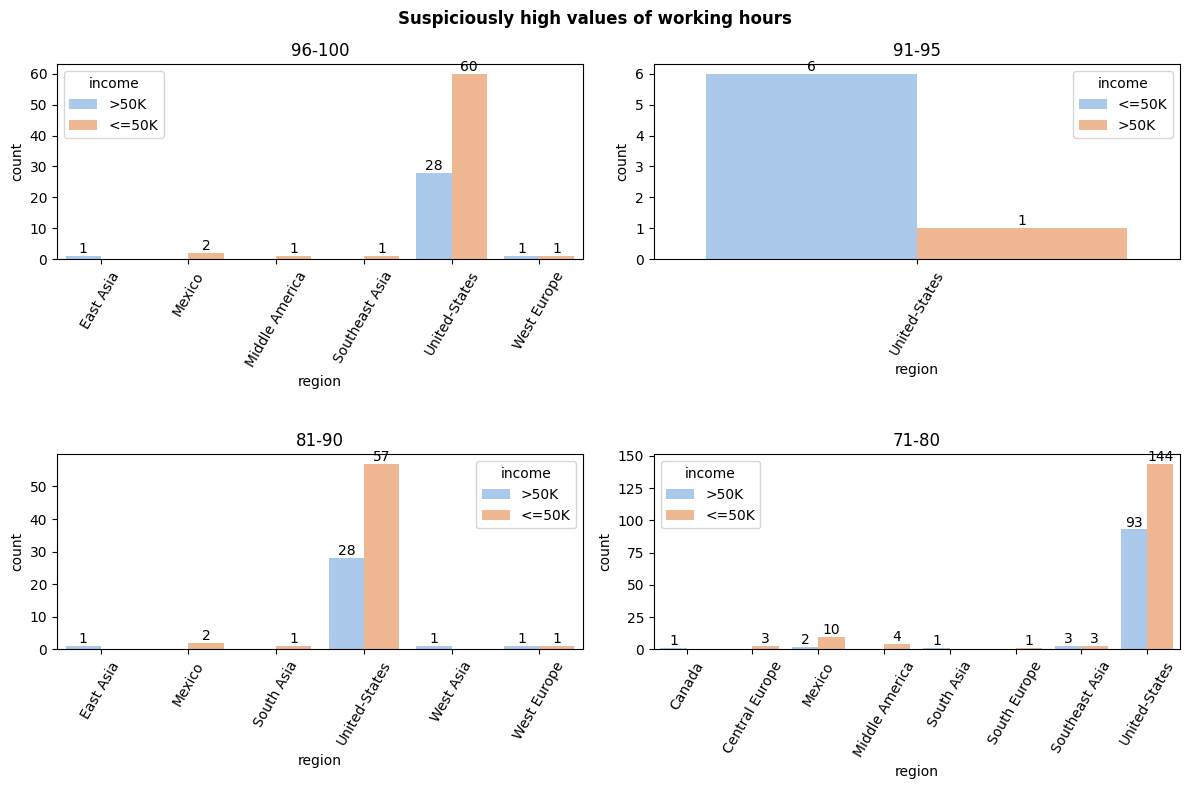

In [254]:
draw_subplots_high('region',60, hue_col="income") #wroc

C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_17004\3789780747.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

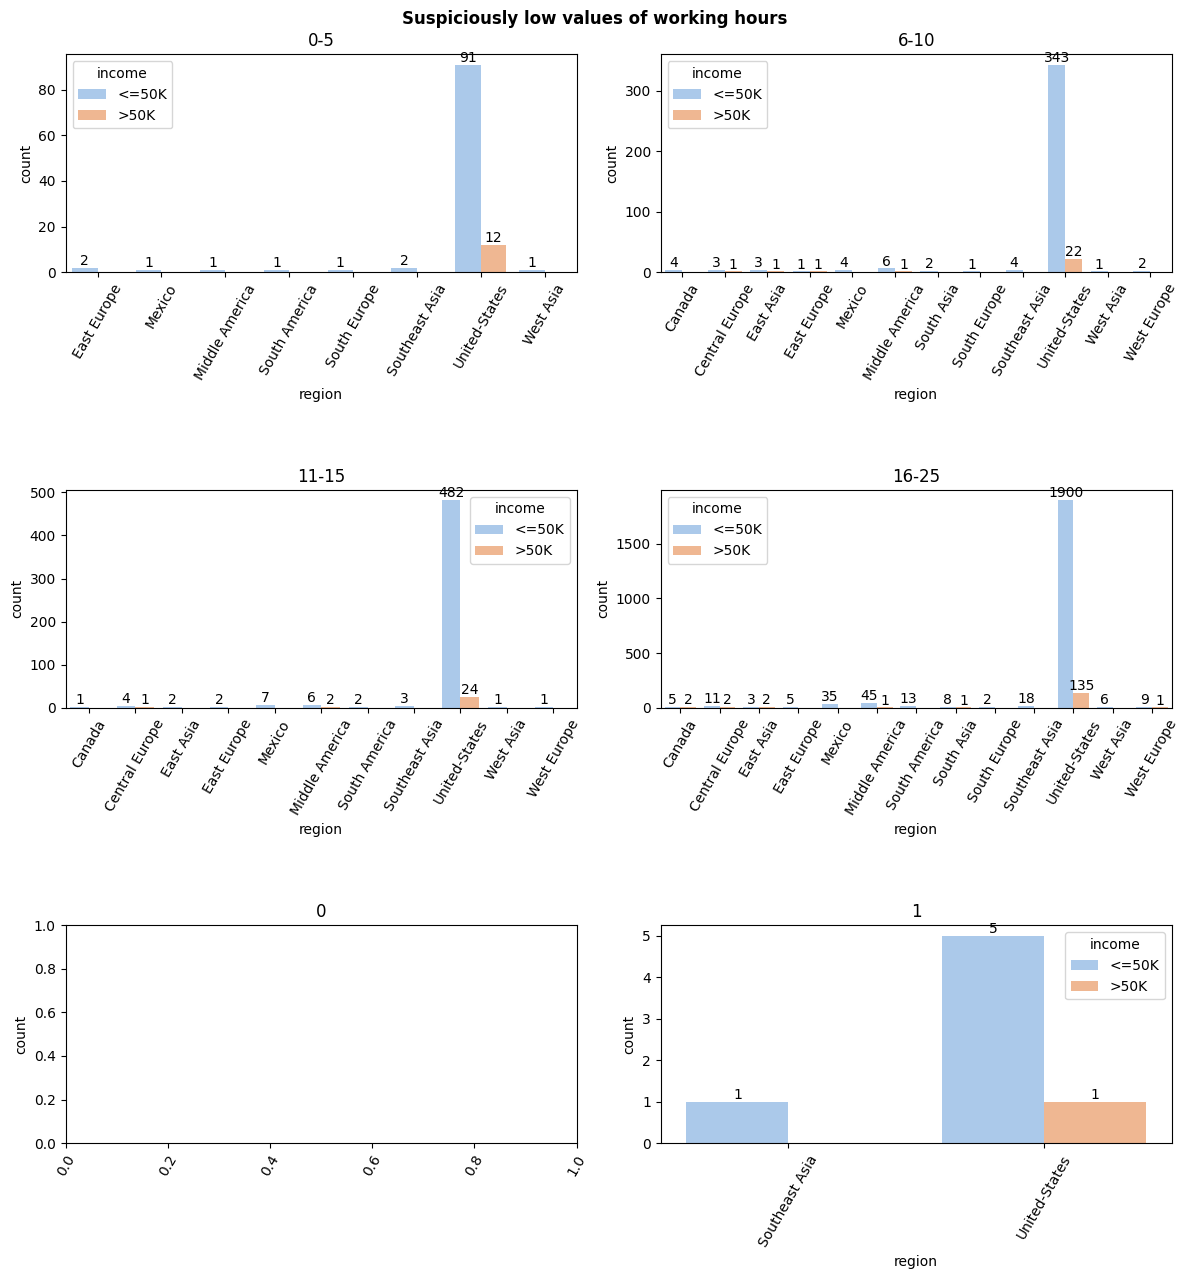

In [255]:
draw_subplots_low("region",60, hue_col="income")